In [154]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import math
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

In [297]:
burger = pd.read_csv( '/Users/zzz/Dropbox/未命名文件夹/data/分类餐厅/sandwich.csv',encoding = 'latin-1',index_col = 0)

In [298]:
burger.head(3)

,business_id,name,city,state,postal_code,latitude,longitude,is_open,categories,attributes.GoodForKids,...,attributes.RestaurantsCounterService,hours.Monday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours.Tuesday,order,circle
1,64799,Subway,Calgary,AB,T2G 2Y8,51.016861,-114.045131,1,"Restaurants, Fast Food, Sandwiches",TRUE,...,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,16425,0
2,110519,Subway,Calgary,AB,T3R 0A1,51.156239,-114.158201,1,"Fast Food, Restaurants, Sandwiches",NaN,...,NaN,7:0-22:0,7:0-22:0,7:0-22:0,7:0-22:0,7:0-21:0,9:0-21:0,7:0-22:0,34717,0
3,29387,Subway,Calgary,AB,T2C 4E1,50.992371,-113.960684,1,"Soccer, Restaurants, Fast Food, Sandwiches, Ac...",TRUE,...,NaN,4:0-22:0,4:0-22:0,4:0-22:0,4:0-22:0,8:0-17:0,8:0-17:0,4:0-22:0,35671,0


In [301]:
bid = burger['business_id'].unique()

In [302]:
import json
data_file = '/Users/zzz/Desktop/STAT628/Module 2/Data/review_train.json'

r_sample = []
with open(data_file, 'r') as f:
    r_sample.append(f.readlines())

In [303]:
r_sample1 = r_sample[0]
review = []

for i in range(0,len(r_sample1)):
    r_review = json.loads(r_sample1[i])
    if r_review['business_id'] in bid:
        review.append(r_review)

In [ ]:
review[0]['business_id']

In [287]:
review[11164]

{'business_id': 74623,
 'stars': 1.0,
 'text': "I can not stand this Walgreens!!!! The pharmacy is horrible!!! Every time I go there I get the same excuse oh we are backed up! We don't have that medicine, we're short staffed! We always have to wait at least 20-30 mins minimum every time! Oh and don't forget about when you call to talk to someone in the pharmacy! They have hung up on me multiple times! My recommendation take your medicine and get it at another Walgreens they are probably going to tell you they need to send you to another one anyway!",
 'date': '2018-03-13 01:25:59'}

In [288]:
business_id = []
text = []
stars = []
name = []

In [289]:
for i in range(0,11164):
    business_id.append(review[i]['business_id'])
    text.append(review[i]['text'])
    stars.append(review[i]['stars'])

In [291]:
burger_r = pd.DataFrame(business_id)
burger_r.insert(1,'text',text)
burger_r.insert(2,'stars',stars)
burger_r.columns = ['business_id', 'text','stars']
#burger_r.to_csv("/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/newdata/Store/shop_r.csv")
burger_r.head(3)

,business_id,text,stars
0,144289,Besides this Walmart being ghetto they are inc...,1.0
1,82250,"As convenience stores go, this one could be th...",1.0
2,144289,"It's a Walmart. Friendly staff, clean, lively....",3.0


In [292]:
burger_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 3 columns):
business_id    11164 non-null int64
text           11164 non-null object
stars          11164 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 261.7+ KB


In [293]:
sbur = burger.iloc[:,lambda df:[0,1,2,3,56]]
sbur.head(3)

,business_id,name,city,state,circle
1,173423,7-Eleven,Calgary,AB,0
2,45614,7-Eleven,Calgary,AB,0
3,6283,Walmart,Calgary,AB,0


In [295]:
bur = pd.merge(sbur,burger_r)
#bur.to_csv("/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/newdata/Store/shop_r.csv")
bur.head(3)

,business_id,name,city,state,circle,text,stars
0,173423,7-Eleven,Calgary,AB,0,Had to work super early and swung by to grab a...,1.0
1,173423,7-Eleven,Calgary,AB,0,Oh 7-Eleven my penny candy and late night snac...,4.0
2,173423,7-Eleven,Calgary,AB,0,They over charge for items\n They are never pr...,1.0


In [296]:
bur.shape[0]

11164

In [133]:
import re

bur.loc[:,'text']=bur['text'].apply(lambda sen: re.sub(r"can\'t", "can not", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"cannot", "can not ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"what\'s", "what is", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"\'ve ", " have ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"n\'t", " not ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"i\'m", "i am ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"\'re", " are ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"\'d", " would ", sen))
bur['text']=bur['text'].apply(lambda sen: re.sub(r"\'ll", " will ", sen))

In [134]:
data_dict=bur

In [ ]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [83]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  36277


[('food', 24387),
 ('order', 20329),
 ('time', 13265),
 ('service', 12699),
 ('place', 11420),
 ('fries', 11287),
 ('location', 10858),
 ('burger', 8833),
 ('drive', 8250),
 ('chicken', 7530),
 ('minutes', 6661),
 ('McDonald', 6091),
 ('thru', 6030),
 ('people', 5482),
 ('manager', 5329),
 ('customer', 5158),
 ('staff', 4891),
 ('way', 4486),
 ('times', 4274),
 ('window', 4234)]

In [84]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  13125


[('good', 10732),
 ('great', 4819),
 ('fast', 4018),
 ('bad', 4005),
 ('fresh', 3732),
 ('nice', 3565),
 ('hot', 3514),
 ('wrong', 3375),
 ('little', 3335),
 ('new', 2924),
 ('first', 2826),
 ('friendly', 2800),
 ('clean', 2760),
 ('sure', 2670),
 ('last', 2575),
 ('better', 2553),
 ('best', 2438),
 ('much', 2415),
 ('worst', 2395),
 ('small', 2289)]

In [85]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  3131


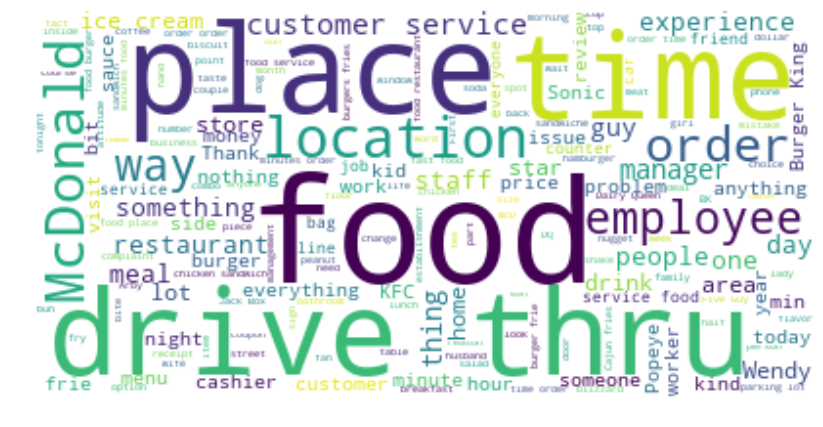

In [86]:
plt.style.use('ggplot')
tt = ' '.join(NN)
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
wordcloud = WordCloud(background_color="white").generate(tt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.title('Reviews',size=20)
plt.show()

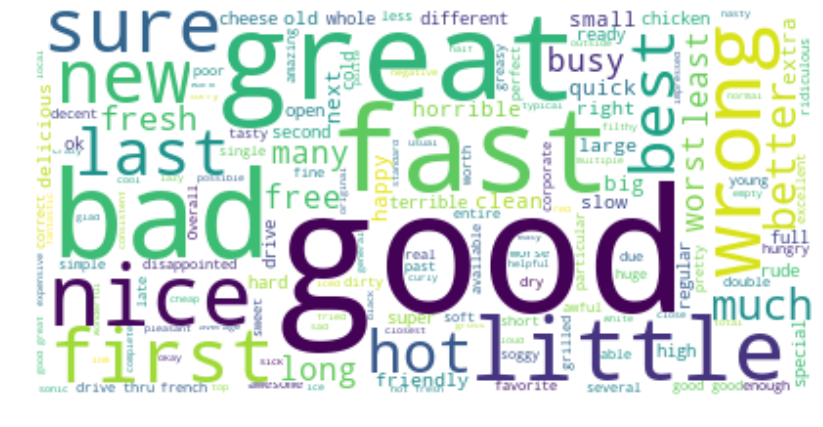

In [87]:
plt.style.use('ggplot')
tt = ' '.join(JJ)
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
wordcloud = WordCloud(background_color="white").generate(tt)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
#plt.title('Reviews',size=20)
plt.show()

In [125]:
sb_R = pd.read_csv('/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/subway_r.csv',encoding = 'latin-1',index_col=0)

In [126]:
sb_R.head(3)

,business_id,city,state,circle,text,stars
0,64799,Calgary,AB,0.0,Several years ago I worked in the area and wou...,3.0
1,64799,Calgary,AB,0.0,OMG!! I'm ordering a steak & cheese footling. ...,1.0
2,64799,Calgary,AB,0.0,Subway location in a Mac's location just off o...,3.0


In [128]:
sb_R['length'] = sb_R['text'].apply(len)
sb_R.head()

,business_id,city,state,circle,text,stars,length
0,64799,Calgary,AB,0.0,Several years ago I worked in the area and wou...,3.0,467
1,64799,Calgary,AB,0.0,OMG!! I'm ordering a steak & cheese footling. ...,1.0,270
2,64799,Calgary,AB,0.0,Subway location in a Mac's location just off o...,3.0,130
3,110519,Calgary,AB,0.0,My aunt and I had lunch here on the weekend. S...,4.0,251
4,110519,Calgary,AB,0.0,Fuck this place. Nothing worse than sitting tr...,1.0,297


In [129]:
sb_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 7 columns):
business_id    1986 non-null int64
city           1986 non-null object
state          1986 non-null object
circle         1896 non-null float64
text           1986 non-null object
stars          1986 non-null float64
length         1986 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 124.1+ KB


In [130]:
sb1 = sb_R.sort_values('business_id')
sb1.head(3)

,business_id,city,state,circle,text,stars,length
1502,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127
1506,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167
1500,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281


In [131]:
sb1['stars'].mean()

2.6852970795568982

In [134]:
s = sb1.groupby('business_id')['stars'].mean()
#s

In [135]:
num = sb1.groupby('business_id')['stars'].count()
#num

In [143]:
a = sb1['business_id'].unique()
business_id = []
stars=[]
Num=[]
for i in a:    
    business_id.append(i)
    stars.append(s[i])
    Num.append(num[i])
    #print(i,m[i],num[i])
    
df = pd.DataFrame({'business_id':business_id,'avgstar':stars,'num':Num})
df.head(3) #246

,business_id,avgstar,num
0,53,2.666667,9
1,1667,2.666667,3
2,4349,3.333333,3


In [146]:
df4 = df[df['num']>=3]
df4.head(3)  #243/246

,business_id,avgstar,num
0,53,2.666667,9
1,1667,2.666667,3
2,4349,3.333333,3


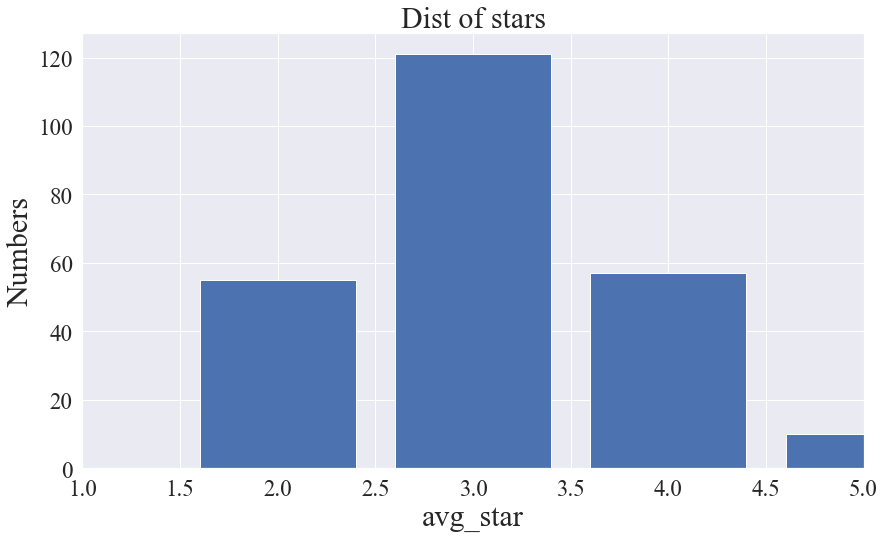

In [147]:
star = np.array([2., 3., 4., 5.])
s2 = sum(df4['avgstar']<=2)
s3 = sum(df4['avgstar']<=3)
s4 = sum(df4['avgstar']<=4)
s5 =sum(df4['avgstar']<=5)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 30,
         }

c = [s2,s3-s2,s4-s3,s5-s4] #[322, 203, 32, 1]
#fig = plt.figure()
figsize = 14,8
figure, ax = plt.subplots(figsize=figsize)

plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]


plt.bar(star,c)
plt.xlabel("avg_star", font2)
plt.ylabel("Numbers", font2)
plt.title("Dist of stars", font2)
plt.xlim([1,5])

plt.show()

In [151]:
new_sb = pd.merge(sb1,df4)
new_sb.head(3) #1980

,business_id,city,state,circle,text,stars,length,avgstar,num
0,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127,2.666667,9
1,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167,2.666667,9
2,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281,2.666667,9


In [280]:
l_sb = new_sb[new_sb['avgstar']<=3]
l_sb.to_csv("l_sb.csv")
l_sb = pd.read_csv('l_sb.csv',encoding='latin-1')
l_sb.head(20)

,Unnamed: 0,business_id,city,state,circle,text,stars,length,avgstar,num
0,0,53,Las Vegas,NV,0.0,Rudeness. What happened to $5 footlongs? 2 san...,2.0,127,2.666667,9
1,1,53,Las Vegas,NV,0.0,Their breads are pretty good ! a lot of fresh ...,5.0,167,2.666667,9
2,2,53,Las Vegas,NV,0.0,Never thought I'd be compelled to write a revi...,5.0,281,2.666667,9
3,3,53,Las Vegas,NV,0.0,Came for a quick breakfast on my way to work e...,1.0,927,2.666667,9
4,4,53,Las Vegas,NV,0.0,So my girl in I just went to this subway. You ...,2.0,362,2.666667,9
5,5,53,Las Vegas,NV,0.0,Jasper was really nice and just overall very g...,5.0,145,2.666667,9
6,6,53,Las Vegas,NV,0.0,"The ladies here are so rude, I speak Spanish f...",1.0,284,2.666667,9
7,7,53,Las Vegas,NV,0.0,"The store is closed after midnight.But,on the ...",1.0,118,2.666667,9
8,8,53,Las Vegas,NV,0.0,Been to this subway a few times.\nThe place is...,2.0,298,2.666667,9
9,9,1667,Mesa,AZ,1.0,"Come visit us! New management, new staff! Ment...",5.0,217,2.666667,3


In [281]:
l_sb.shape[0]

1420

In [282]:
h_sb = new_sb[new_sb['avgstar']>3]
h_sb.to_csv("h_sb.csv")
h_sb = pd.read_csv('h_sb.csv',encoding='latin-1')

In [283]:
h_sb.shape[0]

560

In [250]:
data_dict=l_sb

In [251]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [252]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  4862


[('Subway', 744),
 ('sandwich', 707),
 ('service', 494),
 ('location', 484),
 ('time', 456),
 ('food', 379),
 ('subway', 377),
 ('order', 349),
 ('customer', 327),
 ('bread', 301),
 ('place', 300),
 ('sandwiches', 269),
 ('sub', 245),
 ('people', 212),
 ('employees', 207),
 ('staff', 203),
 ('guy', 172),
 ('store', 168),
 ('times', 166),
 ('way', 157)]

In [253]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  1593


[('good', 289),
 ('great', 173),
 ('fresh', 171),
 ('clean', 156),
 ('bad', 144),
 ('nice', 139),
 ('friendly', 129),
 ('sandwich', 123),
 ('rude', 121),
 ('little', 114),
 ('first', 111),
 ('last', 108),
 ('sure', 105),
 ('extra', 95),
 ('new', 92),
 ('much', 91),
 ('next', 85),
 ('busy', 82),
 ('quick', 80),
 ('better', 79)]

In [254]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  559


In [255]:
words=NN
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
#print('Unique words: ', len((vocab_to_int_n)))
#counts.most_common(20)

In [256]:
#l_nouns = pd.read_csv("l_nouns.csv")
a = vocab
nouns = []
freq=[]
Num=[]
#l = counts.sum
for i in a:    
    nouns.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/1420)  

l_nouns = pd.DataFrame({'noun':nouns,'num':Num,'freqs':freq})
l_nouns.head(3)

,noun,num,freqs
0,Subway,744,0.523944
1,sandwich,707,0.497887
2,service,494,0.347887


In [257]:
words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
#print('Unique words: ', len((vocab_to_int_j)))
#counts.most_common(20)

In [258]:
a = vocab
adjs = []
freq=[]
Num=[]
for i in a:    
    adjs.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/1420)   
    
l_adjs = pd.DataFrame({'adj':adjs,'num':Num,'freqs':freq})
l_adjs.head(3)

,adj,num,freqs
0,good,289,0.203521
1,great,173,0.121831
2,fresh,171,0.120423


In [259]:
h_sb.head(20)

,Unnamed: 0,business_id,city,state,circle,text,stars,length,avgstar,num,NN,JJ,RB
0,12,4349,North Royalton,OH,NaN,All sandwiches are served with a side of bad a...,2.0,487,3.333333,3,"[sandwiches, side, attitude, location, home, b...","[bad, close, disappointing, great, extra]","[quite, sadly, n't, perhaps, n't, actually]"
1,13,4349,North Royalton,OH,NaN,North Royalton and Broadview have their fair s...,4.0,562,3.333333,3,"[North, Royalton, Broadview, share, Subways, t...","[fair, pleasant, attentive, wrong, little, sma...","[really, Sometimes, really, definitely, back]"
2,14,4349,North Royalton,OH,NaN,-Slow And Steady-\n\nI went to this Subway the...,4.0,1403,3.333333,3,"[Subway, day, experience, location, bit, Subwa...","[-Slow, Steady-, good, major, little, typical,...","[pretty, never, away, nearby, slowly, else, ah..."
3,65,13741,Monroe,NC,0.0,"Went in to get a SUB since it is a SUB shop, I...",1.0,178,3.750000,4,"[Went, SUB, SUB, shop, goodness, sakes, SUBway...","[sub, flat]","[n't, even, Not]"
4,66,13741,Monroe,NC,0.0,Grilled chicken on oat wheat bread with all th...,4.0,892,3.750000,4,"[chicken, oat, wheat, bread, fixins, sauce, me...","[mexican, good, Januany, steady, hard, first, ...","[especially, quickly, twice, less, Really, n't..."
5,67,13741,Monroe,NC,0.0,Subway recently started an online ordering as ...,5.0,407,3.750000,4,"[Subway, online, ordering, part, iPhone, app, ...","[great, closest, ready]","[recently, usually, back]"
6,68,13741,Monroe,NC,0.0,Service was great. Rob was very nice and after...,5.0,218,3.750000,4,"[Service, Rob, customer, sauces, Donna, hesita...","[great, nice, fresh, delicious]","[outside, away]"
7,69,14197,Phoenix,AZ,0.0,Wow we just went in at midnight and I have to ...,5.0,253,3.687500,16,"[Wow, midnight, service, Mike, counter, guy, t...","[amazing, helpful, super, good]","[never, better, well, back]"
8,70,14197,Phoenix,AZ,0.0,I go to this subway many times a week because ...,5.0,255,3.687500,16,"[times, week, staff, food, subways, staff, kin...","[many, great, delicious, great]","[subway, also, even, even, better]"
9,71,14197,Phoenix,AZ,0.0,I went in here at 2am and ordered four sandwic...,5.0,329,3.687500,16,"[sandwiches, artist, name, Xavier, sandwiches,...","[sandwich, helpful, attitude, sandwich, extra]","[definitely, back]"


In [284]:
data_dict=h_sb

In [285]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

import nltk 
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english')) 

from nltk import *
data_dict.loc[:,'NN'] =None
data_dict.loc[:,'JJ']=None
data_dict.loc[:,'RB']=None


import numpy as np
def detect(text):
    NN = []
    JJ = []
    RB = []
    text =  word_tokenize(text)
    temp = nltk.pos_tag(text)
    i = 0
    for word, tag in temp:
        if word in stop_words:
            continue
        if re.match('JJ[*]?', tag) != None:
            JJ.append(word)
        if re.match('NN[*]?', tag) != None:
            NN.append(word)
        if re.match('RB[*]?', tag) != None:
            RB.append(word)
    return list([NN, JJ, RB])

temp = pd.DataFrame(list(data_dict['text'].apply(detect)))
data_dict['NN'], data_dict['JJ'], data_dict['RB'] = temp[:][0], temp[:][1], temp[:][2]

In [286]:
NN = []

for item in data_dict['NN']:
    NN += item
#count the words
from collections import Counter

#count the words
words=NN

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
print('Unique words: ', len((vocab_to_int_n)))
counts.most_common(20)

Unique words:  2503


[('Subway', 300),
 ('sandwich', 251),
 ('service', 200),
 ('location', 187),
 ('subway', 167),
 ('food', 144),
 ('time', 125),
 ('sandwiches', 112),
 ('staff', 100),
 ('place', 93),
 ('order', 90),
 ('customer', 89),
 ('sub', 87),
 ('lunch', 87),
 ('bread', 84),
 ('way', 80),
 ('employees', 80),
 ('store', 77),
 ('line', 65),
 ('people', 64)]

In [287]:
JJ = []
for item in data_dict['JJ']:
    JJ += item
#count the words
from collections import Counter

words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
print('Unique words: ', len((vocab_to_int_j)))
counts.most_common(20)

Unique words:  823


[('good', 150),
 ('great', 126),
 ('friendly', 111),
 ('clean', 103),
 ('fresh', 93),
 ('nice', 87),
 ('best', 65),
 ('extra', 48),
 ('quick', 48),
 ('sandwich', 46),
 ('bad', 45),
 ('little', 39),
 ('new', 39),
 ('busy', 32),
 ('last', 32),
 ('sure', 31),
 ('next', 30),
 ('fast', 29),
 ('much', 26),
 ('super', 25)]

In [288]:
#####################
RB = []
for item in data_dict['RB']:
    RB += item
#count the words
from collections import Counter

words=RB

# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_r = {word: ii for ii, word in enumerate(vocab, 1)}
#常见R
print('Unique words: ', len((vocab_to_int_r)))
counts.most_common(20)

reviews_ints_r = []
reviews_ints_r.append([vocab_to_int_r[word] for word in RB])

Unique words:  311


In [289]:
words=NN
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_n = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_n = []
reviews_ints_n.append([vocab_to_int_n[word] for word in NN])
#print('Unique words: ', len((vocab_to_int_n)))
#counts.most_common(20)

In [290]:
a = vocab
nouns = []
freq=[]
Num=[]
for i in a:    
    nouns.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/560)   
    
h_nouns = pd.DataFrame({'noun':nouns,'num':Num,'freq':freq})
#h_nouns.to_csv("h_nouns.csv")
#h_nouns = pd.read_csv("h_nouns.csv")
h_nouns.head(3)

,noun,num,freq
0,Subway,300,0.535714
1,sandwich,251,0.448214
2,service,200,0.357143


In [291]:
words=JJ
# words wrong datatype
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int_j = {word: ii for ii, word in enumerate(vocab, 1)}

reviews_ints_j = []
reviews_ints_j.append([vocab_to_int_j[word] for word in JJ])
#常见J
#print('Unique words: ', len((vocab_to_int_j)))
#counts.most_common(20)

In [292]:
a = vocab
adjs = []
freq=[]
Num=[]
for i in a:    
    adjs.append(i)
    Num.append(counts[i])
    freq.append(counts[i]/560)   
    
h_adjs = pd.DataFrame({'adj':adjs,'num':Num,'freq':freq})
#h_adjs.to_csv("h_adjs.csv")
#h_adjs = pd.read_csv("h_adjs.csv")
h_adjs.head(3)

,adj,num,freq
0,good,150,0.267857
1,great,126,0.225000
2,friendly,111,0.198214


In [293]:
l_nouns.head()

,noun,num,freqs
0,Subway,744,0.523944
1,sandwich,707,0.497887
2,service,494,0.347887
3,location,484,0.340845
4,time,456,0.321127


In [294]:
h_nouns.head()

,noun,num,freq
0,Subway,300,0.535714
1,sandwich,251,0.448214
2,service,200,0.357143
3,location,187,0.333929
4,subway,167,0.298214


In [295]:
new = pd.merge(l_nouns,h_nouns, on = 'noun')
new['FREQ'] = new['freq']-new['freqs'] #freqs--> l_nouns
new = new.iloc[(-new['FREQ'].abs()).argsort()]
new.head()
#new.to_csv("new.csv")
#new = pd.read_csv("new.csv")
new.head()

,noun,num_x,freqs,num_y,freq,FREQ
4,time,456,0.321127,125,0.223214,-0.097912
7,order,349,0.245775,90,0.160714,-0.085060
8,customer,327,0.230282,89,0.158929,-0.071353
9,bread,301,0.211972,84,0.150000,-0.061972
1,sandwich,707,0.497887,251,0.448214,-0.049673


In [325]:
(new['FREQ']<0).sum()

566

In [326]:
y = new['FREQ'].head(20)
x = new['noun'].head(20)

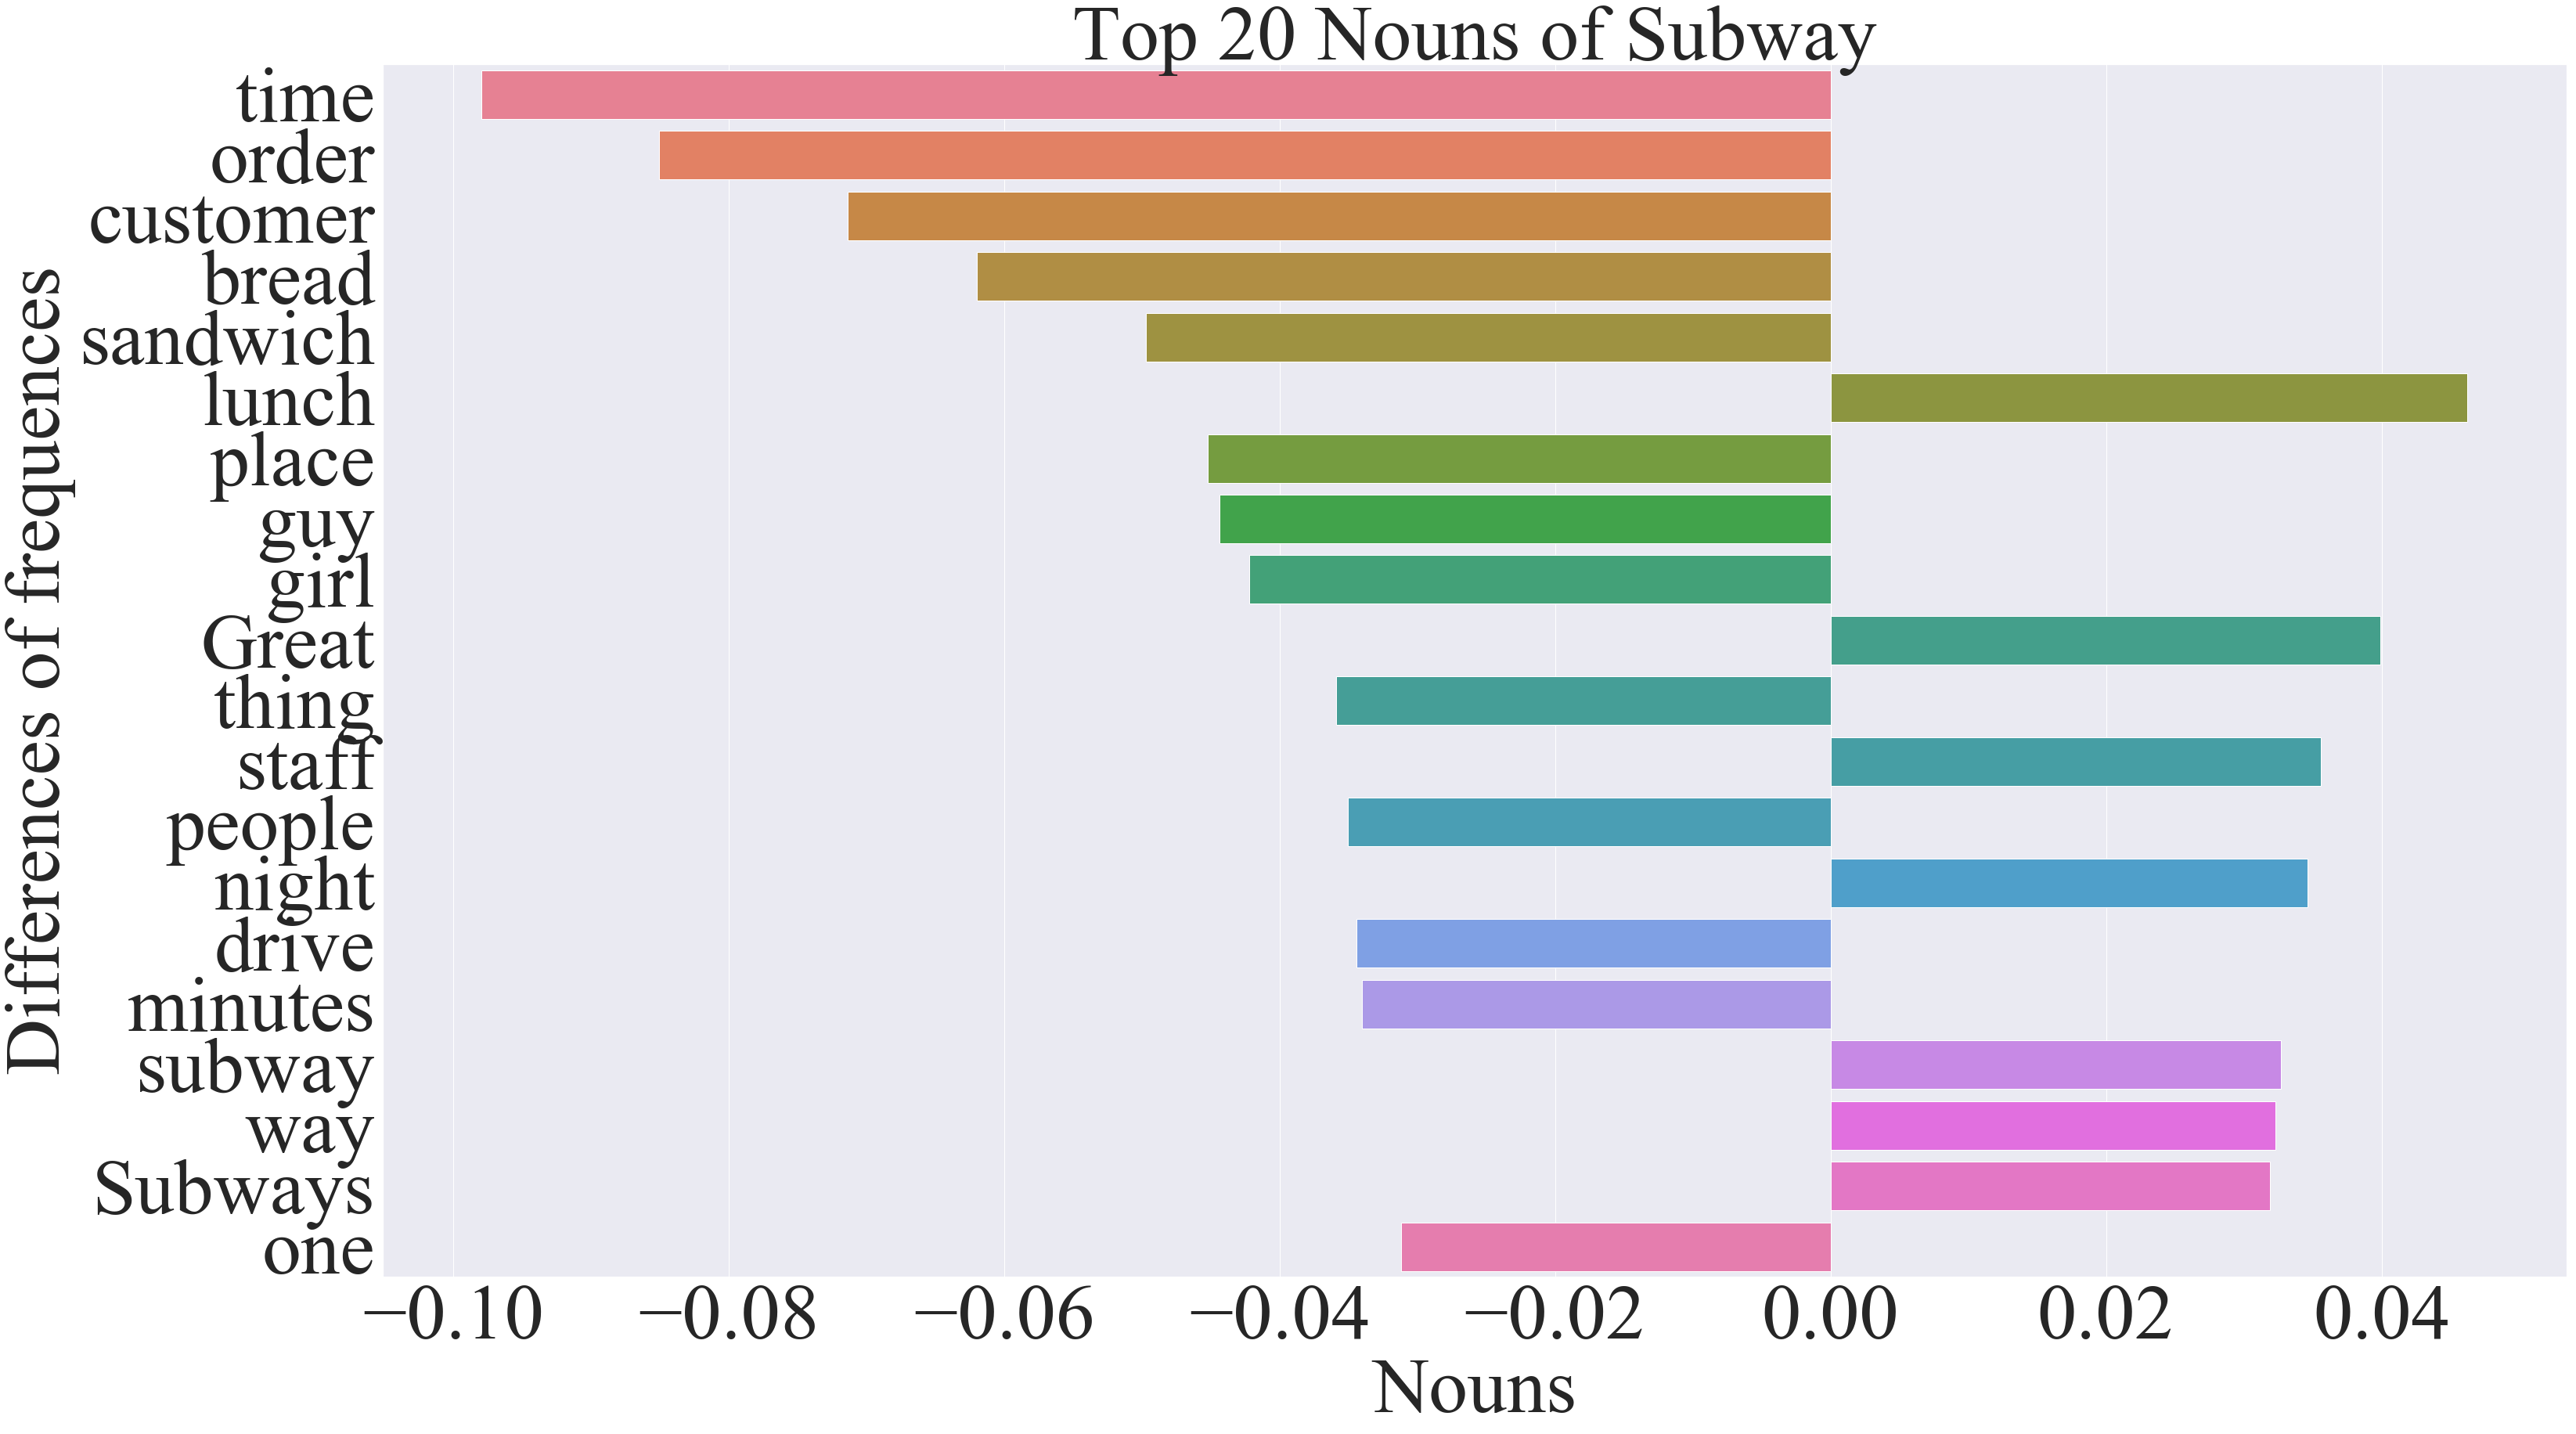

In [328]:
figsize = 50,28.5
figure, ax = plt.subplots(figsize=figsize)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 100,
         }

sns.barplot(x=y,y=x, palette='husl', ax=ax)

plt.tick_params(labelsize=100)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.barh(x,y)
plt.xlabel("Nouns", font2)
plt.ylabel("Differences of frequences", font2)
plt.title("Top 20 Nouns of Subway", font2)
#plt.xlim([-2,20])
#plt.xticks(rotation=60)

plt.show()

In [330]:
l_adjs.head()

,adj,num,freqs
0,good,289,0.203521
1,great,173,0.121831
2,fresh,171,0.120423
3,clean,156,0.109859
4,bad,144,0.101408


In [331]:
h_adjs.head()

,adj,num,freq
0,good,150,0.267857
1,great,126,0.225000
2,friendly,111,0.198214
3,clean,103,0.183929
4,fresh,93,0.166071


In [332]:
old = pd.merge(l_adjs,h_adjs, on = 'adj')
old['FREQ'] = old['freq']-old['freqs'] #freqs--> l_nouns
old = old.iloc[(-old['FREQ'].abs()).argsort()]
old.head()
#old.to_csv("old.csv")
#old = pd.read_csv("old.csv")
old.head()

,adj,num_x,freqs,num_y,freq,FREQ
6,friendly,129,0.090845,111,0.198214,0.107369
1,great,173,0.121831,126,0.225000,0.103169
3,clean,156,0.109859,103,0.183929,0.074069
0,good,289,0.203521,150,0.267857,0.064336
21,best,75,0.052817,65,0.116071,0.063255


In [333]:
y = old['FREQ'].head(20)
x = old['adj'].head(20)

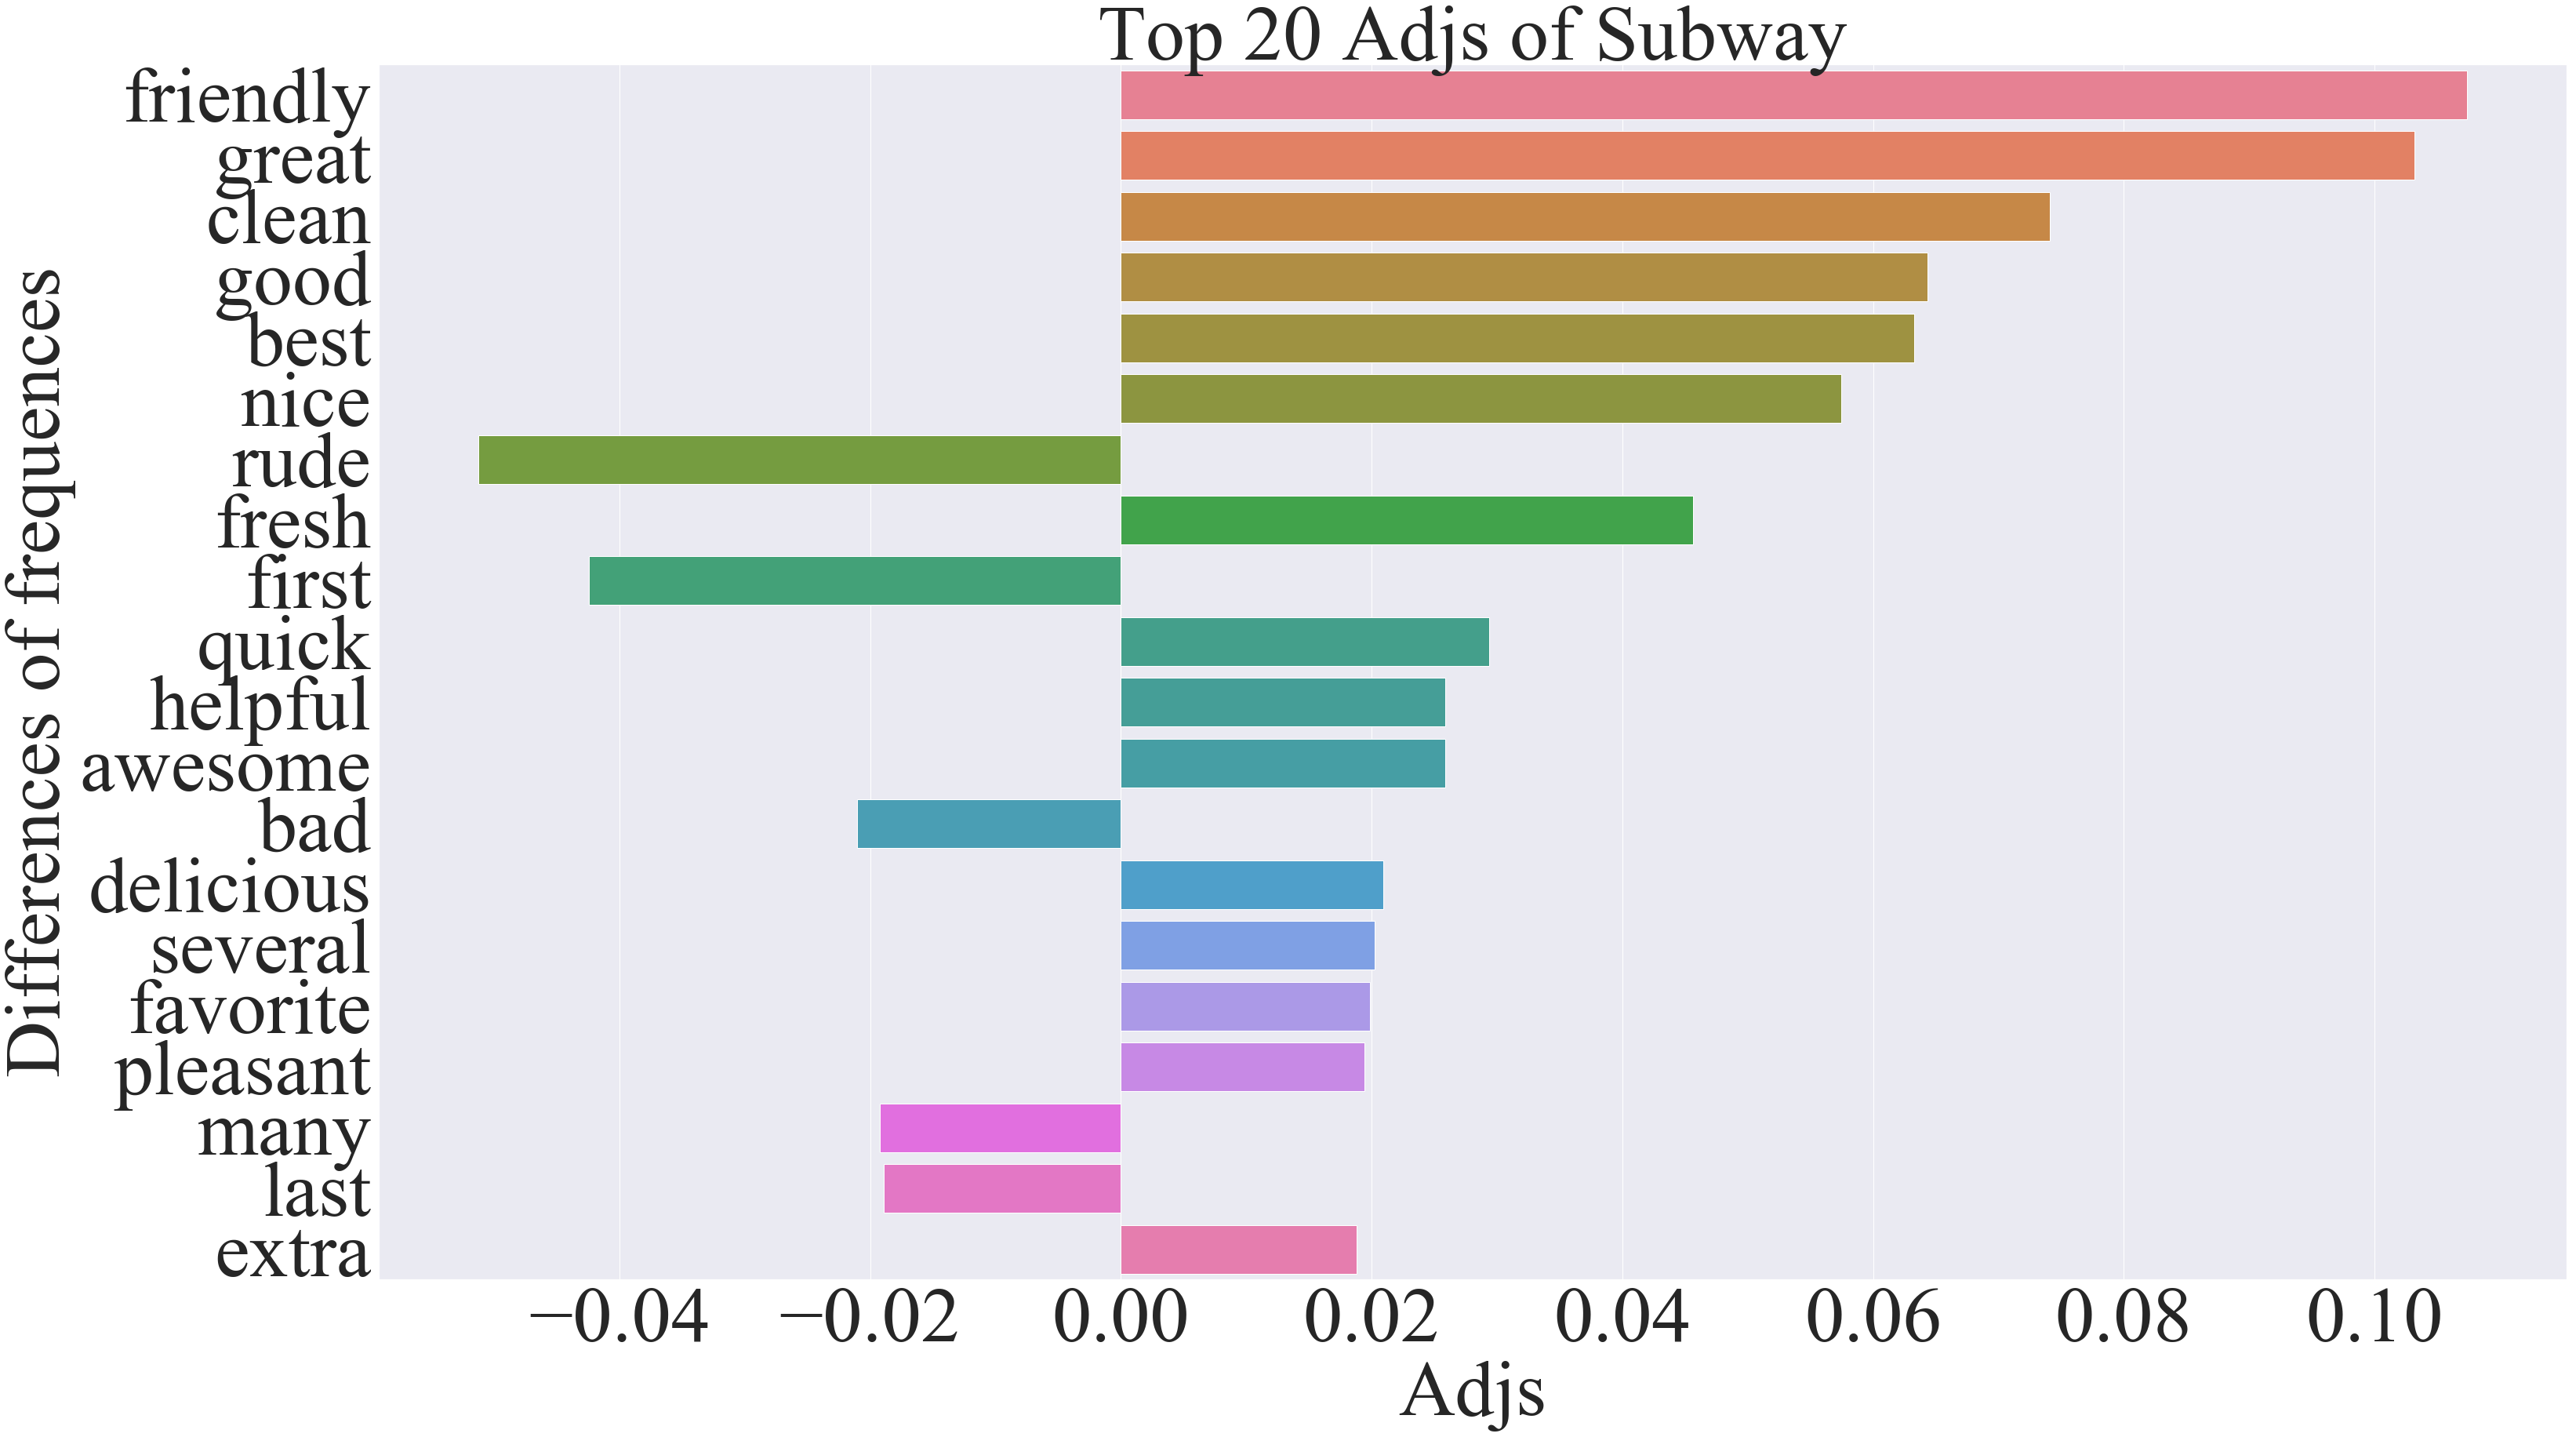

In [334]:
figsize = 50,28.5
figure, ax = plt.subplots(figsize=figsize)

font2 = {'family': 'Times New Roman',
         'weight': 'normal',
         'size': 100,
         }



plt.tick_params(labelsize=100)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#plt.barh(x,y,palette='husl')

sns.barplot(x=y,y=x, palette='husl', ax=ax)

plt.xlabel("Adjs", font2)
plt.ylabel("Differences of frequences", font2)
plt.title("Top 20 Adjs of Subway", font2)
#plt.xlim([-1,20])
#plt.xticks(rotation=45)
plt.show()

In [ ]:
s = a.groupby('business_id')['stars'].mean()
num = a.groupby('business_id')['stars'].count()
b = a['business_id'].unique()
business_id = []
stars=[]
Num=[]
for i in b:    
    business_id.append(i)
    stars.append(s[i])
    Num.append(num[i])
    #print(i,m[i],num[i])
    
df = pd.DataFrame({'business_id':business_id,'avgstar':stars,'num':Num})
df.head(3) #246

In [75]:
a = pd.read_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/all.csv", encoding = "utf-8")
a.head(3)

,Unnamed: 0,business_id,name,city,state,circle,text,stars,NN,avgstar,num,latitude,longitude
0,0,173463,Dairy Queen Brazier,Calgary,AB,0,This is the worst Dairy Queen I have been to e...,1.0,"['Dairy', 'Queen', 'lots', 'Dairy', 'Queen', '...",1.25,4,51.013827,-114.132786
1,1,173463,Dairy Queen Brazier,Calgary,AB,0,Microwaved hamburgers. Begrudgingly gives napk...,1.0,"['hamburgers', 'Begrudgingly', 'napkins', 'Bli...",1.25,4,51.013827,-114.132786
2,2,173463,Dairy Queen Brazier,Calgary,AB,0,I do not understand why this DQ restaurant is...,2.0,"['DQ', 'restaurant', 'DQ', 'Brazier', 'Dairy',...",1.25,4,51.013827,-114.132786


In [102]:
b = a.iloc[:,lambda df:[1,2,3,4,5,9,10,11,12]]
b.head(3)

,business_id,name,city,state,circle,avgstar,num,latitude,longitude
0,173463,Dairy Queen Brazier,Calgary,AB,0,1.25,4,51.013827,-114.132786
1,173463,Dairy Queen Brazier,Calgary,AB,0,1.25,4,51.013827,-114.132786
2,173463,Dairy Queen Brazier,Calgary,AB,0,1.25,4,51.013827,-114.132786


In [109]:
c = b.drop_duplicates()
c.head(3)

,business_id,name,city,state,circle,avgstar,num,latitude,longitude
0,173463,Dairy Queen Brazier,Calgary,AB,0,1.250000,4,51.013827,-114.132786
4,14859,KFC,Calgary,AB,0,1.833333,6,51.073353,-114.164668
10,64109,McDonald's,Calgary,AB,0,2.333333,3,51.014124,-114.000422


In [120]:
q = c.iloc[:,lambda df:[0,1,3,5]]
q.head(3)

,business_id,name,state,avgstar
0,173463,Dairy Queen Brazier,AB,1.250000
4,14859,KFC,AB,1.833333
10,64109,McDonald's,AB,2.333333


In [121]:
#q.to_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/small.csv")

In [116]:
a.head(3)

,Unnamed: 0,business_id,name,city,state,circle,text,stars,NN,avgstar,num,latitude,longitude
0,0,173463,Dairy Queen Brazier,Calgary,AB,0,This is the worst Dairy Queen I have been to e...,1.0,"['Dairy', 'Queen', 'lots', 'Dairy', 'Queen', '...",1.25,4,51.013827,-114.132786
1,1,173463,Dairy Queen Brazier,Calgary,AB,0,Microwaved hamburgers. Begrudgingly gives napk...,1.0,"['hamburgers', 'Begrudgingly', 'napkins', 'Bli...",1.25,4,51.013827,-114.132786
2,2,173463,Dairy Queen Brazier,Calgary,AB,0,I do not understand why this DQ restaurant is...,2.0,"['DQ', 'restaurant', 'DQ', 'Brazier', 'Dairy',...",1.25,4,51.013827,-114.132786


In [122]:
sdist = a.iloc[:,lambda df:[1,7]]
sdist.head(3)
sdist.to_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/sdist.csv")

In [139]:
a = pd.read_csv("/Users/zzz/Dropbox/未命名文件夹/data/res_by_name/newdata/Store/shop_r.csv", encoding = "utf-8",index_col = 0)
a.head(3)

,business_id,name,city,state,circle,text,stars,NN
0,173423,7-Eleven,Calgary,AB,0,Had to work super early and swung by to grab a...,1.0,"['Had', 'swung', 'vanilla', 'coffee', 'machine..."
1,173423,7-Eleven,Calgary,AB,0,Oh 7-Eleven my penny candy and late night snac...,4.0,"['penny', 'candy', 'night', 'snack', 'attack',..."
2,173423,7-Eleven,Calgary,AB,0,They over charge for items\n They are never pr...,1.0,"['charge', 'items', 'coffee', 'app', 'beverage..."


In [140]:
sdist = a.iloc[:,lambda df:[0,6]]
sdist.to_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/shop_star.csv")
sdist.head(3)

,business_id,stars
0,173423,1.0
1,173423,4.0
2,173423,1.0


In [133]:
#a['name'].unique()

array(['Starbucks', 'Second Cup', "Denny's", 'Second Cup McKenzie Towne',
       'Tim Hortons', 'The Second Cup',
       'Second Cup-Peter Lougheed Centre', "Denny's All Nighter",
       'Second Cup Kensington', 'Panera Bread', 'Dunkin Donuts',
       "Denny's Restaurant", 'Tim Hortons Cafe & Bake Shop',
       'Starbucks Coffee', 'Dunkin Donuts  Baskin Robbins',
       'Dunkin Donuts Baskin Robbins', 'Dunkin Donuts & Baskin Robbins',
       'Second Cup Market Place', 'Second Cup Colossus',
       'Second Cup Queensway', 'Tim hortons',
       'Second Cup At Empress Walk', 'Second Cup Coffee',
       'Cafe Second Cup', 'Dennys'], dtype=object)

In [148]:
a = pd.read_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/allstar.csv", encoding = "utf-8")
a.head(3)

,business_id,stars,cat
0,173423,1,6
1,173423,4,6
2,173423,1,6


In [151]:
sdist = a.iloc[:,lambda df:[0,2]]
sdist = sdist.drop_duplicates()
#sdist.to_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/allstar.csv")
sdist.head(3)

,business_id,cat
0,173423,6
3,45614,6
6,6283,6


In [153]:
a = pd.read_csv("/Users/zzz/Desktop/STAT628/Module 2/shinyapp/allsp.csv", encoding = "utf-8")
a.head(3)

,Unnamed: 0.1,business_id,name,city,state,circle,text,stars,NN,food_ex,...,JJ,RB,food_NN,food_JJ,food_RB,service_NN,service_JJ,service_RB,score_food,score_service
0,0,64799,Subway,Calgary,AB,0,"['several', 'years', 'ago', 'i', 'worked', 'in...",3.0,"['years', 'area', 'place', 'sandwich', 'Toront...","['sandwich', 'lunch']",...,quick quick,None None,sandwich,quick,None,sandwich,quick,None,[4],[4]
1,1,64799,Subway,Calgary,AB,0,"['omg', 'im', 'ordering', 'a', 'steak', 'chees...",1.0,"['OMG', 'steak', 'footling', 'lady', 'gloves',...","['steak', 'toppings', 'cheese']",...,chinese,None,NaN,NaN,NaN,lady,chinese,None,[None],[4]
2,2,64799,Subway,Calgary,AB,0,"['subway', 'location', 'in', 'a', 'macs', 'loc...",3.0,"['Subway', 'location', 'Mac', 'location', 'Bla...","['lunch', 'fast']",...,macs,None,NaN,NaN,NaN,location,macs,None,[None],[3]
